In [1]:
import pandas as pd
raw_data=pd.read_excel("/Users/omkardesai/Downloads/proper_file_31012024.xlsx")
raw_data

,Link_to_File,ListAcronym,Version,Date,ZenodoDOI,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_EXT_DATASOURCE_INCHIKEY,PUBCHEM_EXT_DATASOURCE_INCHI,PUBCHEM_EXT_DATASOURCE_SYNONYM,PUBCHEM_SUBSTANCE_COMMENT,Unnamed: 12,UseSynonyms,Unnamed: 14
0,https://zenodo.org/records/3365550/files/UFZWA...,S53_UFZWANATARG,S53.0.1.0,2019-08-11,10.5281/zenodo.3365550,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,NaN,Name|IUPAC_NAME,LC_or_GC,NaN,False,NaN
1,https://zenodo.org/records/3248994/files/EFSAP...,S54_EFSAPRI,S54.0.1.0,2019-06-18,10.5281/zenodo.3248994,https://www.norman-network.com/nds/SLE/,NaN,SMILES,StdInChIKey,NaN,Name,NaN,NaN,False,NaN
2,https://zenodo.org/records/3248884/files/GREEK...,S57_GREEKPHARMA,S57.0.1.0,2019-06-18,10.5281/zenodo.3248884,https://www.norman-network.com/nds/SLE/,NaN,SMILES,StdInChIKey,NaN,Name,Class,NaN,True,NaN
3,https://zenodo.org/records/3248838/files/UOATA...,S56_UOATARGPHARMA,S56.0.1.0,2019-06-18,10.5281/zenodo.3248838,https://www.norman-network.com/nds/SLE/,NaN,SMILES,StdInChIKey,NaN,Name,Group,NaN,True,NaN
4,https://zenodo.org/records/4248976/files/ZINC1...,S55_ZINC15PHARMA,S55.0.1.1,2020-11-06,10.5281/zenodo.3247749,https://www.norman-network.com/nds/SLE/,ID,SMILES,sdInChIKey,NaN,Chemical_Name,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,https://zenodo.org/records/13835255/files/NORM...,S120_DUSTCT2024,S120.0.1.0,2024-09-24,10.5281/zenodo.13835254,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,Name,NaN,NaN,True,NaN
122,https://zenodo.org/records/14396808/files/EAWA...,S121_EAWAGBBD,S121.0.1.0,2024-12-11,10.5281/zenodo.14396807,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,Name|Synonym,NaN,NaN,True,NaN
123,https://zenodo.org/records/14613346/files/S122...,S122_PBTPFASNTA,S122.0.1.0,2025-01-08,10.5281/zenodo.14613345,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,Name|LongName|Preferred_Name,NaN,NaN,True,NaN
124,https://zenodo.org/records/14679058/files/S123...,S123_LITCHEMPLAST,S123.0.1.0,2025-01-17,10.5281/zenodo.14679057,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,Substance|CASRN,NaN,NaN,False,NaN


In [2]:
import requests as req
import regex as re
def remove_file_path(link):
    base_url = re.sub(r"/files/.*", "", link)
    return base_url


# citation and version script

In [6]:
pip install webdriver_manager

  Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl.metadata (12 kB)
Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl (27 kB)
Note: you may need to restart the kernel to use updated packages.


# Script to scrape version_count, citation and latest_version_date

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import re
import time


def scrape_data_version_date(url):
    # Set up the Chrome driver
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    
    try:
        # Navigate to the webpage
        driver.get(remove_file_path(url))
        
        # Wait for the page to load and for dynamic content to be rendered
        time.sleep(5)  # Adjust the sleep time if necessary
        
        # Initialize variables to store the citation number, version count, and latest version date
        citation_number = 0
        version_count = 1
        latest_version_date = None
        
        # Try to find the element containing the citation number
        try:
            citation_element = driver.find_element(By.CSS_SELECTOR, '.ui.small.circular.label.neutral')
            citation_number = citation_element.text
        except:
            pass
        
        # Try to find the element containing the version count
        try:
            versions_link = driver.find_element(By.CSS_SELECTOR, 'a.font-small')
            versions_text = versions_link.text
            
            # Use regular expression to extract the version count from the text
            version_count_match = re.search(r'all (\d+) versions', versions_text)
            if version_count_match:
                version_count = version_count_match.group(1)
        except:
            pass
        
        # Try to find the element containing the latest version date
        try:
            latest_version_date_element = driver.find_element(By.CSS_SELECTOR, 'small.text-muted-darken')
            latest_version_date = latest_version_date_element.text.strip()
        except:
            pass
        
        return citation_number, version_count, latest_version_date
    
    finally:
        # Close the browser
        driver.quit()



In [9]:
scrape_data_version_date("https://zenodo.org/records/3365550/files/UFZWANATARG_11082019.csv")

('1', 1, 'Aug 11, 2019')

In [10]:
links=list(raw_data["Link_to_File"])

In [11]:
links

['https://zenodo.org/records/3365550/files/UFZWANATARG_11082019.csv',
 'https://zenodo.org/records/3248994/files/EFSAPRI_212List_18062019.csv',
 'https://zenodo.org/records/3248884/files/GREEKPHARMA_18062019.csv',
 'https://zenodo.org/records/3248838/files/UOATARGPHARMA_18062019.csv',
 'https://zenodo.org/records/4248976/files/ZINC15PHARMA.csv',
 'https://zenodo.org/records/3247728/files/SYNTHCANNAB_17062019.csv',
 'https://zenodo.org/records/3247724/files/PSYCHOCANNAB_17062019.csv',
 'https://zenodo.org/records/3247682/files/MassBankEU_Cmpds_11042017_wMS_DTXSIDs_03102017.csv',
 'https://zenodo.org/records/3242298/files/litminedneuro_list_chemicals-2019-06-10-09-31-17.csv',
 'https://zenodo.org/records/2669467/files/THSMOKE_THS_Suspects_06052019.csv',
 'https://zenodo.org/records/2658170/files/WRIGCHRMS_04042019.csv',
 'https://zenodo.org/records/6860818/files/S50_CCSCOMPEND_Substances.csv',
 'https://zenodo.org/records/2658153/files/CPPdb_ListB_Mapped_06032019.csv',
 'https://zenodo.o

In [12]:
def for_all_links(links):
    a=[]
    for i in links:
        citation_number,version_count ,latest_version_date = scrape_data_version_date(remove_file_path(i))
        a.append(
            {"ulr":i,
             "citation_number":citation_number,
             "version_count":version_count,
             "latest_version_date":latest_version_date}
        )
    return a
        

In [13]:
import pandas as pd
dict_data=for_all_links(links)
citation_dtaa=pd.DataFrame(dict_data)


In [78]:
citation_dtaa.rename(columns={"ulr":"Link_to_File"},inplace=True)

In [14]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

import requests
from bs4 import BeautifulSoup
import re

def scrape_data_views_downloads(url):
    try:
        # Send a GET request to the URL
        response = requests.get(remove_file_path(url))
        response.raise_for_status()  # Raise an exception for HTTP errors

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the views section
        views_section = soup.find('td', {'data-label': 'All versions', 'class': 'right aligned'}, 
                                  text=re.compile(r'\d'))
        
        # Find the total downloads section
        downloads_section = soup.find('td', {'data-label': 'All versions'}, 
                                       text=re.compile(r'\d')).find_next('td', {'data-label': 'All versions'})

        # Extract the views and downloads values
        views = views_section.text.strip().replace(',', '') if views_section else None
        downloads = downloads_section.text.strip().replace(',', '') if downloads_section else None

        # Return the results
        return {
            "url": url,
            "views": views,
            "downloads": downloads,
        }

    except Exception as e:
        # Handle exceptions and return error details
        return {"url": url, "error": str(e)}


# Function to process the dataframe
def process_dataframe_1(df):
    # Initialize empty lists for storing views and downloads
    total_views = []
    total_downloads = []

    # Iterate over each link in the 'Link_to_File' column
    for url in df['Link_to_File']:
        # Scrape the data for each URL
        result = scrape_data_views_downloads(url)
        total_views.append(result.get("views"))
        total_downloads.append(result.get("downloads"))

    # Add the views and downloads data to the dataframe
    df['total_views_2025'] = total_views
    df['total_downloads_2025'] = total_downloads

    # Split the 'ListAcronym' column into 'list' and 'name'
    df[['list', 'name']] = df['ListAcronym'].str.extract(r'([^_]+)_(.+)')

    return df



In [15]:
processed_data=process_dataframe_1(raw_data)

/var/folders/m0/c8r_k2sn0hb4r5_9lj5dlzh80000gq/T/ipykernel_53596/2377616441.py:19: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  views_section = soup.find('td', {'data-label': 'All versions', 'class': 'right aligned'},
/var/folders/m0/c8r_k2sn0hb4r5_9lj5dlzh80000gq/T/ipykernel_53596/2377616441.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  downloads_section = soup.find('td', {'data-label': 'All versions'},


In [16]:
processed_data

,Link_to_File,ListAcronym,Version,Date,ZenodoDOI,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_EXT_DATASOURCE_INCHIKEY,PUBCHEM_EXT_DATASOURCE_INCHI,PUBCHEM_EXT_DATASOURCE_SYNONYM,PUBCHEM_SUBSTANCE_COMMENT,Unnamed: 12,UseSynonyms,Unnamed: 14,total_views_2025,total_downloads_2025,list,name
0,https://zenodo.org/records/3365550/files/UFZWA...,S53_UFZWANATARG,S53.0.1.0,2019-08-11,10.5281/zenodo.3365550,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,NaN,Name|IUPAC_NAME,LC_or_GC,NaN,False,NaN,552,979,S53,UFZWANATARG
1,https://zenodo.org/records/3248994/files/EFSAP...,S54_EFSAPRI,S54.0.1.0,2019-06-18,10.5281/zenodo.3248994,https://www.norman-network.com/nds/SLE/,NaN,SMILES,StdInChIKey,NaN,Name,NaN,NaN,False,NaN,860,1057,S54,EFSAPRI
2,https://zenodo.org/records/3248884/files/GREEK...,S57_GREEKPHARMA,S57.0.1.0,2019-06-18,10.5281/zenodo.3248884,https://www.norman-network.com/nds/SLE/,NaN,SMILES,StdInChIKey,NaN,Name,Class,NaN,True,NaN,538,911,S57,GREEKPHARMA
3,https://zenodo.org/records/3248838/files/UOATA...,S56_UOATARGPHARMA,S56.0.1.0,2019-06-18,10.5281/zenodo.3248838,https://www.norman-network.com/nds/SLE/,NaN,SMILES,StdInChIKey,NaN,Name,Group,NaN,True,NaN,628,898,S56,UOATARGPHARMA
4,https://zenodo.org/records/4248976/files/ZINC1...,S55_ZINC15PHARMA,S55.0.1.1,2020-11-06,10.5281/zenodo.3247749,https://www.norman-network.com/nds/SLE/,ID,SMILES,sdInChIKey,NaN,Chemical_Name,NaN,NaN,False,NaN,1648,1555,S55,ZINC15PHARMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,https://zenodo.org/records/13835255/files/NORM...,S120_DUSTCT2024,S120.0.1.0,2024-09-24,10.5281/zenodo.13835254,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,Name,NaN,NaN,True,NaN,445,603,S120,DUSTCT2024
122,https://zenodo.org/records/14396808/files/EAWA...,S121_EAWAGBBD,S121.0.1.0,2024-12-11,10.5281/zenodo.14396807,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,Name|Synonym,NaN,NaN,True,NaN,65,175,S121,EAWAGBBD
123,https://zenodo.org/records/14613346/files/S122...,S122_PBTPFASNTA,S122.0.1.0,2025-01-08,10.5281/zenodo.14613345,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,Name|LongName|Preferred_Name,NaN,NaN,True,NaN,50,139,S122,PBTPFASNTA
124,https://zenodo.org/records/14679058/files/S123...,S123_LITCHEMPLAST,S123.0.1.0,2025-01-17,10.5281/zenodo.14679057,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,Substance|CASRN,NaN,NaN,False,NaN,46,101,S123,LITCHEMPLAST


In [17]:
citation_dtaa

,ulr,citation_number,version_count,latest_version_date
0,https://zenodo.org/records/3365550/files/UFZWA...,1,1,"Aug 11, 2019"
1,https://zenodo.org/records/3248994/files/EFSAP...,1,1,"Jun 18, 2019"
2,https://zenodo.org/records/3248884/files/GREEK...,0,1,"Jun 18, 2019"
3,https://zenodo.org/records/3248838/files/UOATA...,2,1,"Jun 18, 2019"
4,https://zenodo.org/records/4248976/files/ZINC1...,2,2,"Jun 17, 2019"
...,...,...,...,...
121,https://zenodo.org/records/13835255/files/NORM...,0,1,"Sep 24, 2024"
122,https://zenodo.org/records/14396808/files/EAWA...,0,1,"Dec 11, 2024"
123,https://zenodo.org/records/14613346/files/S122...,0,1,"Jan 8, 2025"
124,https://zenodo.org/records/14679058/files/S123...,0,1,"Jan 17, 2025"


In [18]:
citation_dtaa.rename(columns={"ulr":"Link_to_File"},
                     inplace=True)

In [19]:
final_data_with_date=pd.merge(processed_data,citation_dtaa,on="Link_to_File",how="inner")
final_data_with_date

,Link_to_File,ListAcronym,Version,Date,ZenodoDOI,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_EXT_DATASOURCE_INCHIKEY,PUBCHEM_EXT_DATASOURCE_INCHI,...,Unnamed: 12,UseSynonyms,Unnamed: 14,total_views_2025,total_downloads_2025,list,name,citation_number,version_count,latest_version_date
0,https://zenodo.org/records/3365550/files/UFZWA...,S53_UFZWANATARG,S53.0.1.0,2019-08-11,10.5281/zenodo.3365550,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,NaN,...,NaN,False,NaN,552,979,S53,UFZWANATARG,1,1,"Aug 11, 2019"
1,https://zenodo.org/records/3248994/files/EFSAP...,S54_EFSAPRI,S54.0.1.0,2019-06-18,10.5281/zenodo.3248994,https://www.norman-network.com/nds/SLE/,NaN,SMILES,StdInChIKey,NaN,...,NaN,False,NaN,860,1057,S54,EFSAPRI,1,1,"Jun 18, 2019"
2,https://zenodo.org/records/3248884/files/GREEK...,S57_GREEKPHARMA,S57.0.1.0,2019-06-18,10.5281/zenodo.3248884,https://www.norman-network.com/nds/SLE/,NaN,SMILES,StdInChIKey,NaN,...,NaN,True,NaN,538,911,S57,GREEKPHARMA,0,1,"Jun 18, 2019"
3,https://zenodo.org/records/3248838/files/UOATA...,S56_UOATARGPHARMA,S56.0.1.0,2019-06-18,10.5281/zenodo.3248838,https://www.norman-network.com/nds/SLE/,NaN,SMILES,StdInChIKey,NaN,...,NaN,True,NaN,628,898,S56,UOATARGPHARMA,2,1,"Jun 18, 2019"
4,https://zenodo.org/records/4248976/files/ZINC1...,S55_ZINC15PHARMA,S55.0.1.1,2020-11-06,10.5281/zenodo.3247749,https://www.norman-network.com/nds/SLE/,ID,SMILES,sdInChIKey,NaN,...,NaN,False,NaN,1648,1555,S55,ZINC15PHARMA,2,2,"Jun 17, 2019"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,https://zenodo.org/records/13835255/files/NORM...,S120_DUSTCT2024,S120.0.1.0,2024-09-24,10.5281/zenodo.13835254,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,...,NaN,True,NaN,445,603,S120,DUSTCT2024,0,1,"Sep 24, 2024"
122,https://zenodo.org/records/14396808/files/EAWA...,S121_EAWAGBBD,S121.0.1.0,2024-12-11,10.5281/zenodo.14396807,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,...,NaN,True,NaN,65,175,S121,EAWAGBBD,0,1,"Dec 11, 2024"
123,https://zenodo.org/records/14613346/files/S122...,S122_PBTPFASNTA,S122.0.1.0,2025-01-08,10.5281/zenodo.14613345,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,...,NaN,True,NaN,50,139,S122,PBTPFASNTA,0,1,"Jan 8, 2025"
124,https://zenodo.org/records/14679058/files/S123...,S123_LITCHEMPLAST,S123.0.1.0,2025-01-17,10.5281/zenodo.14679057,https://www.norman-network.com/nds/SLE/,NaN,SMILES,InChIKey,InChI,...,NaN,False,NaN,46,101,S123,LITCHEMPLAST,0,1,"Jan 17, 2025"


### saving the file to use for master file

In [21]:
final_data_with_date.to_csv("final_data_with_everything.csv",index=False)

In [22]:
final_data_with_date.columns

Index(['Link_to_File', 'ListAcronym', 'Version', 'Date', 'ZenodoDOI',
       'PUBCHEM_EXT_DATASOURCE_URL', 'PUBCHEM_EXT_DATASOURCE_REGID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_EXT_DATASOURCE_INCHIKEY',
       'PUBCHEM_EXT_DATASOURCE_INCHI', 'PUBCHEM_EXT_DATASOURCE_SYNONYM',
       'PUBCHEM_SUBSTANCE_COMMENT', 'Unnamed: 12', 'UseSynonyms',
       'Unnamed: 14', 'total_views_2025', 'total_downloads_2025', 'list',
       'name', 'citation_number', 'version_count', 'latest_version_date'],
      dtype='object')

In [23]:
final_data_og=final_data_with_date[["list","name","total_views_2025","total_downloads_2025",
                          "citation_number","version_count","latest_version_date"]]

In [66]:
final_data_og[final_data_og["list"]=="S3"]

,list,name,total_views_2025,total_downloads_2025,citations,versions,latest_version_date
57,S3,NORMANCT15_LC,841,1294,3,2,"Oct 31, 2016"
56,S3,NORMANCT15_GC,841,1294,3,2,"Oct 31, 2016"


In [25]:
final_data_og.rename(columns={"citation_number":"citations",
                              "version_count":"versions"},
                     inplace=True)

/var/folders/m0/c8r_k2sn0hb4r5_9lj5dlzh80000gq/T/ipykernel_53596/4004474485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_og.rename(columns={"citation_number":"citations",


In [26]:
final_data_og.dtypes

list                    object
name                    object
total_views_2025        object
total_downloads_2025    object
citations               object
versions                object
latest_version_date     object
dtype: object

In [27]:
final_data_og["total_views_2025"]=final_data_og["total_views_2025"].astype("int64")
final_data_og["total_downloads_2025"]=final_data_og["total_downloads_2025"].astype("int64")
final_data_og["citations"]=final_data_og["citations"].astype("int64")
final_data_og["versions"]=final_data_og["versions"].astype("int64")

/var/folders/m0/c8r_k2sn0hb4r5_9lj5dlzh80000gq/T/ipykernel_53596/4098336642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_og["total_views_2025"]=final_data_og["total_views_2025"].astype("int64")
/var/folders/m0/c8r_k2sn0hb4r5_9lj5dlzh80000gq/T/ipykernel_53596/4098336642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_og["total_downloads_2025"]=final_data_og["total_downloads_2025"].astype("int64")
/var/folders/m0/c8r_k2sn0hb4r5_9lj5dlzh80000gq/T/ipykernel_53596/4098336642.py:3

In [28]:
final_data_og.sort_values(["total_views_2025"],ascending=False)

,list,name,total_views_2025,total_downloads_2025,citations,versions,latest_version_date
46,S13,EUCOSMETICS,25347,18907,6,4,"May 28, 2020"
74,S73,METXBIODB,10484,3909,4,9,"Aug 6, 2024"
125,S0,SUSDAT,7616,5482,23,13,"Jan 14, 2024"
60,S60,SWISSPEST19,6734,5737,4,5,"Jul 6, 2023"
76,S75,CYANOMETDB,6530,5515,5,4,"Sep 28, 2024"
...,...,...,...,...,...,...,...
108,S107,AQUALITY20,126,353,0,1,"Jun 30, 2023"
120,S119,PLASTCHEM,125,193,0,1,"Sep 24, 2024"
122,S121,EAWAGBBD,65,175,0,1,"Dec 11, 2024"
123,S122,PBTPFASNTA,50,139,0,1,"Jan 8, 2025"


In [29]:
# Function to extract the numeric part of the string
def extract_number(s):
    return int(s[1:])  # Assuming the format is always 'S' followed by a number

# Apply the function to the column and sort
final_data_og['sort_key'] = final_data_og['list'].apply(extract_number)
final_data_og= final_data_og.sort_values(by='sort_key')


/var/folders/m0/c8r_k2sn0hb4r5_9lj5dlzh80000gq/T/ipykernel_53596/2125017850.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_og['sort_key'] = final_data_og['list'].apply(extract_number)


In [30]:
final_data_og

,list,name,total_views_2025,total_downloads_2025,citations,versions,latest_version_date,sort_key
125,S0,SUSDAT,7616,5482,23,13,"Jan 14, 2024",0
7,S1,MASSBANK,1415,1180,2,2,"Jun 17, 2019",1
58,S2,STOFFIDENT,1629,1170,3,5,"Sep 6, 2017",2
57,S3,NORMANCT15_LC,841,1294,3,2,"Oct 31, 2016",3
56,S3,NORMANCT15_GC,841,1294,3,2,"Oct 31, 2016",3
...,...,...,...,...,...,...,...,...
120,S119,PLASTCHEM,125,193,0,1,"Sep 24, 2024",119
121,S120,DUSTCT2024,445,603,0,1,"Sep 24, 2024",120
122,S121,EAWAGBBD,65,175,0,1,"Dec 11, 2024",121
123,S122,PBTPFASNTA,50,139,0,1,"Jan 8, 2025",122


In [31]:
final_data_og[final_data_og["list"]=="S13"]

,list,name,total_views_2025,total_downloads_2025,citations,versions,latest_version_date,sort_key
46,S13,EUCOSMETICS,25347,18907,6,4,"May 28, 2020",13


In [76]:
top_10=final_data_og.sort_values(["total_views_2025"],ascending=False)[0:10]

In [77]:
top_10.to_csv("top_lists_with_citations_and_versions.csv",index=False)

In [78]:
final_data_og

,list,name,total_views_2025,total_downloads_2025,citations,versions,latest_version_date,sort_key
125,S0,SUSDAT,7607,5457,23,13,"Jan 14, 2024",0
7,S1,MASSBANK,1414,1180,2,2,"Jun 17, 2019",1
58,S2,STOFFIDENT,1626,1170,3,5,"Sep 6, 2017",2
57,S3,NORMANCT15_LC,841,1294,3,2,"Oct 31, 2016",3
56,S3,NORMANCT15_GC,841,1294,3,2,"Oct 31, 2016",3
...,...,...,...,...,...,...,...,...
120,S119,PLASTCHEM,124,192,0,1,"Sep 24, 2024",119
121,S120,DUSTCT2024,435,590,0,1,"Sep 24, 2024",120
122,S121,EAWAGBBD,65,175,0,1,"Dec 11, 2024",121
123,S122,PBTPFASNTA,48,137,0,1,"Jan 8, 2025",122


In [79]:
final_data_og[final_data_og["list"]=="S18"]

,list,name,total_views_2025,total_downloads_2025,citations,versions,latest_version_date,sort_key
42,S18,TSCASURF_TSCA_QUEST,1020,723,2,2,"Jul 25, 2017",18
41,S18,TSCASURF_TSCA_PEG,1020,723,2,2,"Jul 25, 2017",18


In [80]:
final_data_og.drop(42,inplace=True)

In [82]:
# below is the final data to be sent with latest version date

In [32]:
final_data_og

,list,name,total_views_2025,total_downloads_2025,citations,versions,latest_version_date,sort_key
125,S0,SUSDAT,7616,5482,23,13,"Jan 14, 2024",0
7,S1,MASSBANK,1415,1180,2,2,"Jun 17, 2019",1
58,S2,STOFFIDENT,1629,1170,3,5,"Sep 6, 2017",2
57,S3,NORMANCT15_LC,841,1294,3,2,"Oct 31, 2016",3
56,S3,NORMANCT15_GC,841,1294,3,2,"Oct 31, 2016",3
...,...,...,...,...,...,...,...,...
120,S119,PLASTCHEM,125,193,0,1,"Sep 24, 2024",119
121,S120,DUSTCT2024,445,603,0,1,"Sep 24, 2024",120
122,S121,EAWAGBBD,65,175,0,1,"Dec 11, 2024",121
123,S122,PBTPFASNTA,50,139,0,1,"Jan 8, 2025",122


In [33]:
# Function to extract the numeric part of the string
def extract_number(s):
    return int(s[1:])  # Assuming the format is always 'S' followed by a number

# Apply the function to the column and sort
final_data_og['sort_key'] = final_data_og['list'].apply(extract_number)
final_data_og= final_data_og.sort_values(by='sort_key')


In [34]:
final_data_og

,list,name,total_views_2025,total_downloads_2025,citations,versions,latest_version_date,sort_key
125,S0,SUSDAT,7616,5482,23,13,"Jan 14, 2024",0
7,S1,MASSBANK,1415,1180,2,2,"Jun 17, 2019",1
58,S2,STOFFIDENT,1629,1170,3,5,"Sep 6, 2017",2
57,S3,NORMANCT15_LC,841,1294,3,2,"Oct 31, 2016",3
56,S3,NORMANCT15_GC,841,1294,3,2,"Oct 31, 2016",3
...,...,...,...,...,...,...,...,...
120,S119,PLASTCHEM,125,193,0,1,"Sep 24, 2024",119
121,S120,DUSTCT2024,445,603,0,1,"Sep 24, 2024",120
122,S121,EAWAGBBD,65,175,0,1,"Dec 11, 2024",121
123,S122,PBTPFASNTA,50,139,0,1,"Jan 8, 2025",122


In [35]:
del final_data_og["sort_key"]

In [43]:
final_data_og

,list,name,total_views_2025,total_downloads_2025,citations,versions,latest_version_date
125,S0,SUSDAT,7616,5482,23,13,"Jan 14, 2024"
7,S1,MASSBANK,1415,1180,2,2,"Jun 17, 2019"
58,S2,STOFFIDENT,1629,1170,3,5,"Sep 6, 2017"
57,S3,NORMANCT15_LC,841,1294,3,2,"Oct 31, 2016"
56,S3,NORMANCT15_GC,841,1294,3,2,"Oct 31, 2016"
...,...,...,...,...,...,...,...
120,S119,PLASTCHEM,125,193,0,1,"Sep 24, 2024"
121,S120,DUSTCT2024,445,603,0,1,"Sep 24, 2024"
122,S121,EAWAGBBD,65,175,0,1,"Dec 11, 2024"
123,S122,PBTPFASNTA,50,139,0,1,"Jan 8, 2025"


In [47]:
final_data_og.drop(42,inplace=True)

In [48]:
final_data_og

,list,name,total_views_2025,total_downloads_2025,citations,versions,latest_version_date
125,S0,SUSDAT,7616,5482,23,13,"Jan 14, 2024"
7,S1,MASSBANK,1415,1180,2,2,"Jun 17, 2019"
58,S2,STOFFIDENT,1629,1170,3,5,"Sep 6, 2017"
57,S3,NORMANCT15_LC,841,1294,3,2,"Oct 31, 2016"
56,S3,NORMANCT15_GC,841,1294,3,2,"Oct 31, 2016"
...,...,...,...,...,...,...,...
120,S119,PLASTCHEM,125,193,0,1,"Sep 24, 2024"
121,S120,DUSTCT2024,445,603,0,1,"Sep 24, 2024"
122,S121,EAWAGBBD,65,175,0,1,"Dec 11, 2024"
123,S122,PBTPFASNTA,50,139,0,1,"Jan 8, 2025"


In [49]:
data_till_2024=pd.read_csv("/Users/omkardesai/Documents/University_job_related_stuff/Web_scrapping_of_zenodo/data_till_2024.csv")
data_till_2024

,List,Total_Views,Total_Downloads,Year
0,S0,5733,3692,2024
1,S1,1100,912,2024
2,S2,1148,845,2024
3,S3,582,797,2024
4,S4,436,602,2024
...,...,...,...,...
315,S94,40,72,2022
316,S95,26,55,2022
317,S96,37,42,2022
318,S97,13,11,2022


In [62]:
data_till_2024[data_till_2024["List"]=="S99"]

,List,Total_Views,Total_Downloads,Year
99,S99,209,247,2024
216,S99,31,83,2023


In [63]:
# Function to extract the numeric part of the string
def extract_number(s):
    return int(s[1:])  # Assuming the format is always 'S' followed by a number

# Apply the function to the column and sort
data_till_2024['sort_key'] = data_till_2024['List'].apply(extract_number)
data_till_2024=data_till_2024.sort_values(by='sort_key')


In [65]:
data_till_2024[data_till_2024["List"]=="S116"]

,List,Total_Views,Total_Downloads,Year,sort_key
116,S116,66,70,2024,116


In [50]:
final_data_for_merge=final_data_og[["list","total_views_2025","total_downloads_2025"]]
final_data_for_merge.rename(columns={"list":"List",
                                     "total_views_2025":"Total_Views",
                                     "total_downloads_2025":"Total_Downloads"},
                            inplace=True)
final_data_for_merge["Year"]=2025

/var/folders/m0/c8r_k2sn0hb4r5_9lj5dlzh80000gq/T/ipykernel_53596/1892679091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_for_merge.rename(columns={"list":"List",
/var/folders/m0/c8r_k2sn0hb4r5_9lj5dlzh80000gq/T/ipykernel_53596/1892679091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_for_merge["Year"]=2025


In [51]:
final_data_for_merge

,List,Total_Views,Total_Downloads,Year
125,S0,7616,5482,2025
7,S1,1415,1180,2025
58,S2,1629,1170,2025
57,S3,841,1294,2025
56,S3,841,1294,2025
...,...,...,...,...
120,S119,125,193,2025
121,S120,445,603,2025
122,S121,65,175,2025
123,S122,50,139,2025


In [52]:
data_2022_2025=pd.concat([data_till_2024,final_data_for_merge])


In [55]:
data_2022_2025[data_2022_2025["List"]=="S1"]

,List,Total_Views,Total_Downloads,Year
1,S1,1100,912,2024
118,S1,571,939,2023
222,S1,416,733,2022
7,S1,1415,1180,2025


In [56]:
import pandas as pd

data_contains_all_info = data_2022_2025

# Convert the Year column to an integer
data_contains_all_info['Year'] = data_contains_all_info['Year'].astype(int)

# Sort the data for proper calculation (by List and Year)
data_contains_all_info = data_contains_all_info.sort_values(by=['List', 'Year']).reset_index(drop=True)

# Calculate yearly views and downloads
data_contains_all_info['Yearly_Views'] = data_contains_all_info.groupby('List')['Total_Views'].diff().fillna(data_contains_all_info['Total_Views'])
data_contains_all_info['Yearly_Downloads'] = data_contains_all_info.groupby('List')['Total_Downloads'].diff().fillna(data_contains_all_info['Total_Downloads'])


data_contains_all_info


,List,Total_Views,Total_Downloads,Year,Yearly_Views,Yearly_Downloads
0,S0,1959,2440,2022,1959.0,2440.0
1,S0,3111,3199,2023,1152.0,759.0
2,S0,5733,3692,2024,2622.0,493.0
3,S0,7616,5482,2025,1883.0,1790.0
4,S1,416,733,2022,416.0,733.0
...,...,...,...,...,...,...
440,S98,390,362,2024,272.0,138.0
441,S98,643,647,2025,253.0,285.0
442,S99,31,83,2023,31.0,83.0
443,S99,209,247,2024,178.0,164.0


In [57]:
data_contains_all_info[data_contains_all_info["List"]=="S1"]

,List,Total_Views,Total_Downloads,Year,Yearly_Views,Yearly_Downloads
4,S1,416,733,2022,416.0,733.0
5,S1,571,939,2023,155.0,206.0
6,S1,1100,912,2024,529.0,-27.0
7,S1,1415,1180,2025,315.0,268.0


In [3]:
# Function to extract the numeric part of the string
def extract_number(s):
    return int(s[1:])  # Assuming the format is always 'S' followed by a number

# Apply the function to the column and sort
data_contains_all_info['sort_key'] = data_contains_all_info['List'].apply(extract_number)
data_contains_all_info=data_contains_all_info.sort_values(by='sort_key')


In [59]:
# below is the dataset contains all info means year wise total downloads and views till date 18th february 

In [2]:
import pandas as pd
data_contains_all_info=pd.read_csv("data_contains_all_info.csv")

In [4]:
data_contains_all_info

,List,Total_Views,Total_Downloads,Year,Yearly_Views,Yearly_Downloads,sort_key
0,S0,1959,2440,2022,1959.0,2440.0,0
1,S0,3111,3199,2023,1152.0,759.0,0
2,S0,5733,3692,2024,2622.0,493.0,0
3,S0,7616,5482,2025,1883.0,1790.0,0
4,S1,416,733,2022,416.0,733.0,1
...,...,...,...,...,...,...,...
56,S119,125,193,2025,125.0,193.0,119
61,S120,445,603,2025,445.0,603.0,120
62,S121,65,175,2025,65.0,175.0,121
63,S122,50,139,2025,50.0,139.0,122


In [5]:
data_contains_all_info.to_csv("data_contains_all_info.csv",index=False)

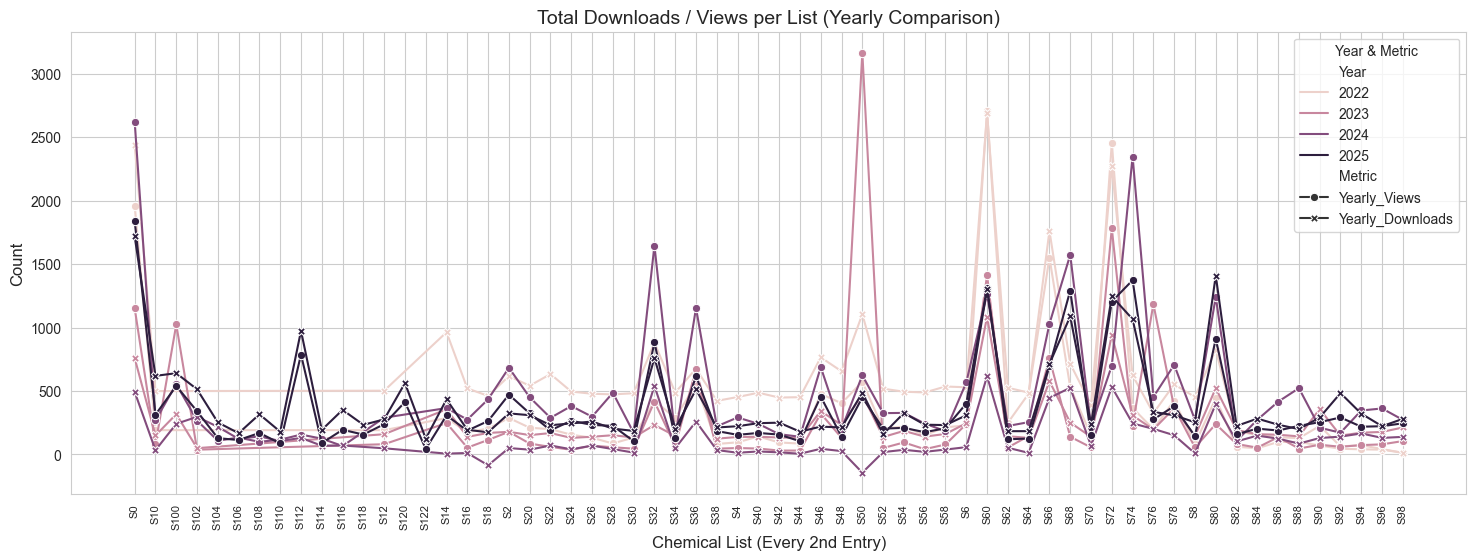

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "data_contains_all_info.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Select relevant columns
df_selected = df[["List", "Year", "Yearly_Views", "Yearly_Downloads"]]

# Melt the data for better visualization
df_melted = df_selected.melt(id_vars=["List", "Year"], value_vars=["Yearly_Views", "Yearly_Downloads"],
                             var_name="Metric", value_name="Count")

# Keep only every second list entry (e.g., S0, S2, S4, ...)
df_melted["List_Index"] = df_melted["List"].str.extract(r'(\d+)').astype(float)  # Extract numerical part
df_filtered = df_melted[df_melted["List_Index"] % 2 == 0]  # Keep even-numbered entries

# Set plot style
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_filtered, x="List", y="Count", hue="Year", style="Metric", markers=True, dashes=False)

# Enhance readability
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel("Chemical List (Every 2nd Entry)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Total Downloads / Views per List (Yearly Comparison)", fontsize=14)
plt.legend(title="Year & Metric", fontsize=10)

# Show the plot
plt.show()


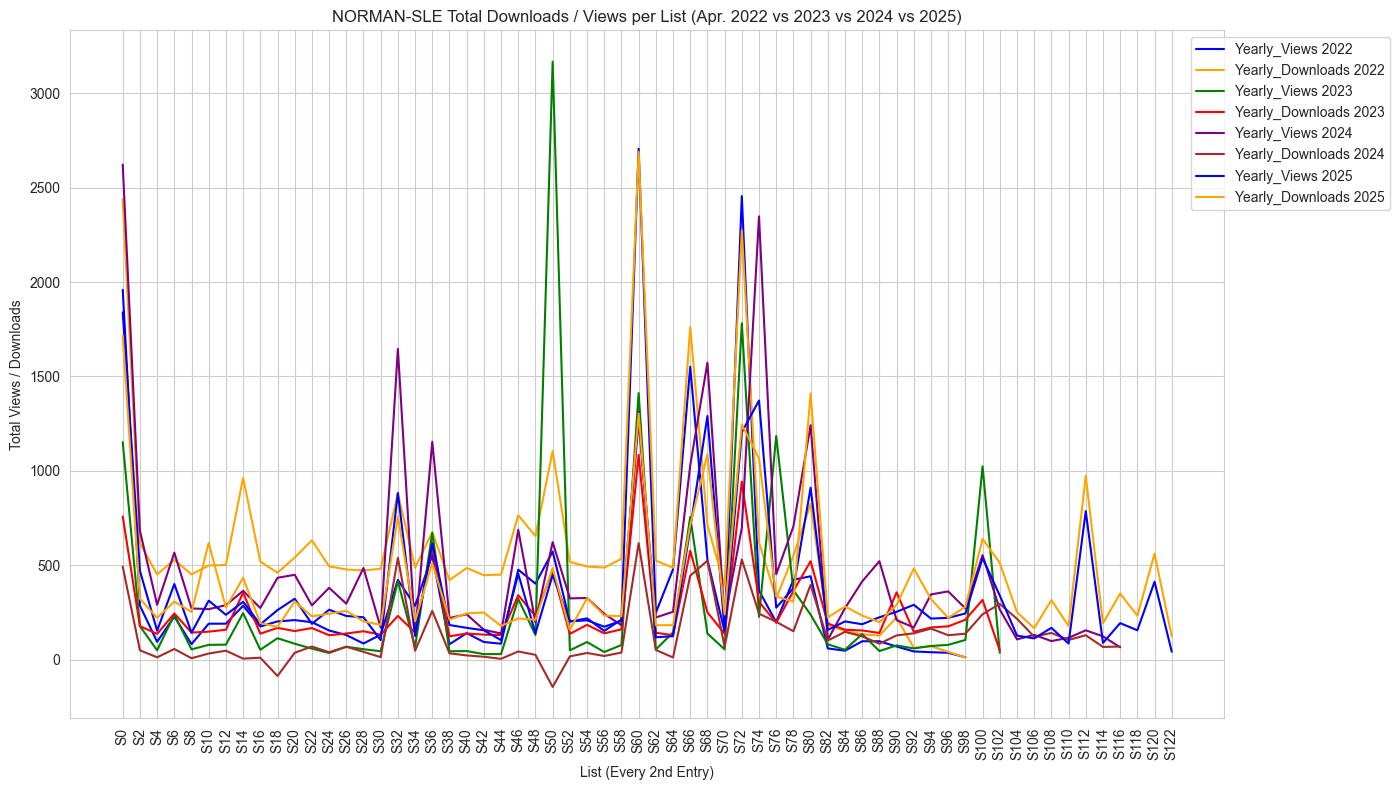

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data_contains_all_info.csv')

# Pivot the data to have List as index and create separate columns for each year's views and downloads
pivot_data = data.pivot_table(index='List', columns='Year', values=['Yearly_Views', 'Yearly_Downloads'], aggfunc='sum')

# Reset index to make 'List' a column again
pivot_data.reset_index(inplace=True)

# Extract numeric part of the list for sorting and filtering
pivot_data['List_Num'] = pivot_data['List'].str.extract(r'(\d+)').astype(float)
pivot_data = pivot_data.sort_values(by='List_Num')

# Define the skip factor (e.g., keep every 2nd entry)
skip_factor = 2
filtered_data = pivot_data.iloc[::skip_factor]  # Keep every nth row

# Plotting
plt.figure(figsize=(14, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Loop through years and metrics
for i, year in enumerate(data['Year'].unique()):  # Unique years from dataset
    for j, metric in enumerate(['Yearly_Views', 'Yearly_Downloads']):
        col_name = (metric, year)
        if col_name in filtered_data.columns:
            plt.plot(filtered_data['List'], filtered_data[col_name], label=f'{metric} {year}', color=colors[(i * 2 + j) % len(colors)])

# Customize the plot
plt.title('NORMAN-SLE Total Downloads / Views per List (Apr. 2022 vs 2023 vs 2024 vs 2025)')
plt.xlabel('List (Every 2nd Entry)')
plt.ylabel('Total Views / Downloads')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.xticks(rotation=90)  # Rotate list names for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
data_contains_all_info[data_contains_all_info["List"]=="S13"]

,List,Total_Views,Total_Downloads,Year,Yearly_Views,Yearly_Downloads
65,S13,11962,10419,2022,11962.0,10419.0
66,S13,18955,13608,2023,6993.0,3189.0
67,S13,21254,14835,2024,2299.0,1227.0
68,S13,25208,18763,2025,3954.0,3928.0


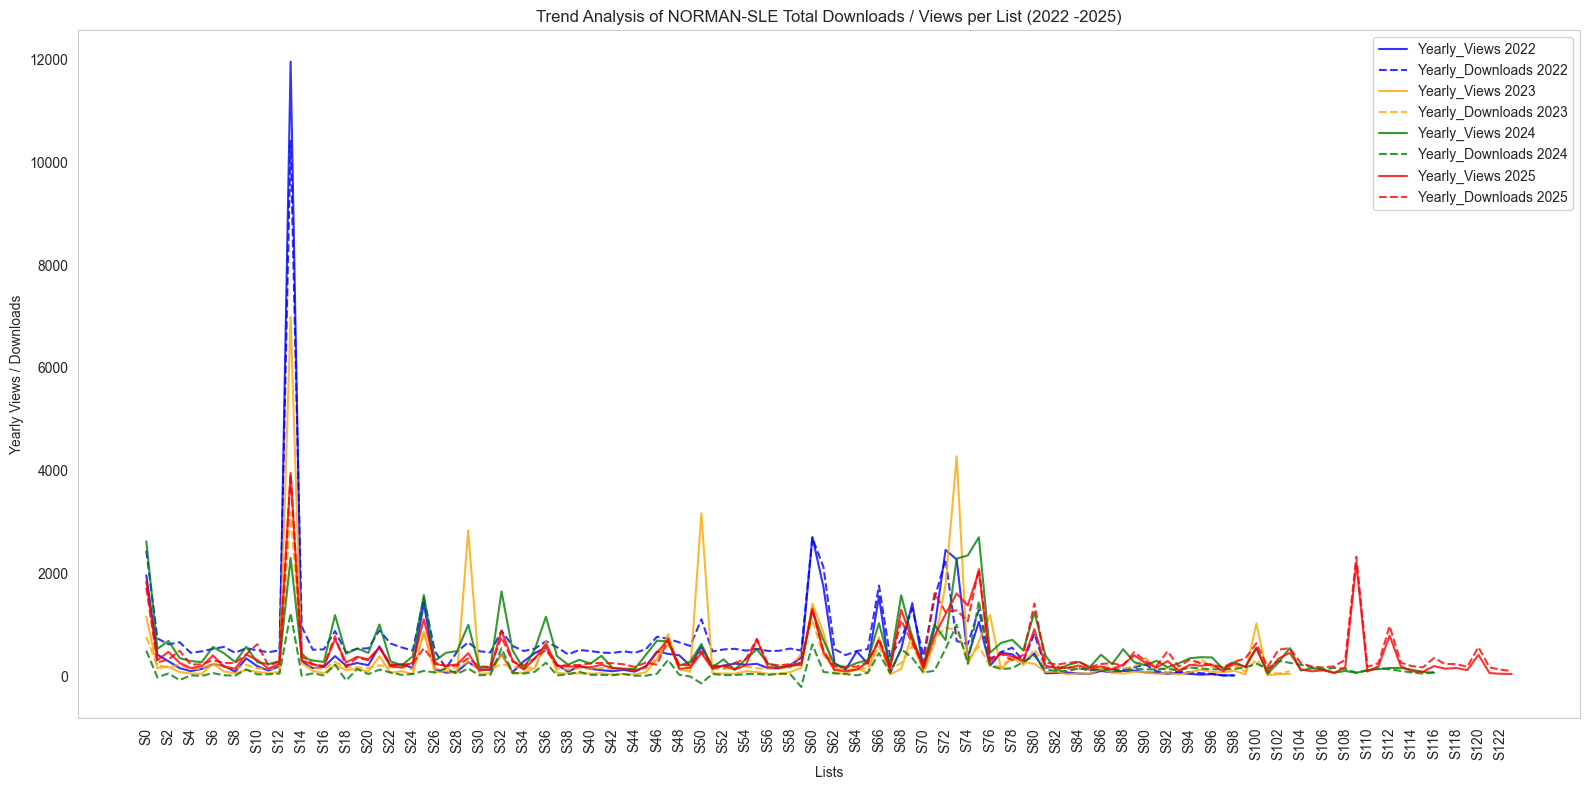

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "data_contains_all_info.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Pivot the data to organize it for trend analysis
pivot_data = data.pivot_table(index='List', columns='Year', values=['Yearly_Views', 'Yearly_Downloads'], aggfunc='sum')

# Reset index to make 'List' a column again
pivot_data.reset_index(inplace=True)

# Extract numeric part of the list for sorting
pivot_data['List_Num'] = pivot_data['List'].str.extract(r'(\d+)').astype(float)
pivot_data = pivot_data.sort_values(by='List_Num')

# Define step to pick every alternate list for x-axis labeling
step = 2
selected_lists = pivot_data['List'][::step]

# Plotting both Yearly Views and Yearly Downloads
plt.figure(figsize=(16, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Loop through years to plot trends for both Views and Downloads
for i, year in enumerate(sorted(data['Year'].unique())):
    views_col = ('Yearly_Views', year)
    downloads_col = ('Yearly_Downloads', year)
    
    if views_col in pivot_data.columns:
        plt.plot(pivot_data['List'], pivot_data[views_col], label=f'Yearly_Views {year}', 
                 color=colors[i % len(colors)], linestyle='solid', alpha=0.8)
    
    if downloads_col in pivot_data.columns:
        plt.plot(pivot_data['List'], pivot_data[downloads_col], label=f'Yearly_Downloads {year}', 
                 color=colors[i % len(colors)], linestyle='dashed', alpha=0.8)

# Customize the plot
plt.title('Trend Analysis of NORMAN-SLE Total Downloads / Views per List (2022 -2025)')
plt.xlabel('Lists')
plt.ylabel('Yearly Views / Downloads')
plt.xticks(selected_lists, rotation=90)  # Label only selected lists for clarity
plt.legend(loc='upper right')
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()




In [134]:
final_data_og[final_data_og["list"]=="S13"]

,list,name,total_views_2025,total_downloads_2025,citations,versions
46,S13,EUCOSMETICS,25208,18763,6,4


In [133]:
final_data_og.drop(42,inplace=True)

In [136]:
final_data_og.to_csv("cumulative_stats_till_2025_with_citations_and_versions.csv",index=False)

In [6]:
final_data_og

NameError: name 'final_data_og' is not defined

# Plot exploration

In [3]:
df = pd.read_csv('/Users/omkardesai/Documents/University_job_related_stuff/Web_scrapping_of_zenodo/merged_data_till_2025.csv')
df

,List,Total_Views,Total_Downloads,Year,name
0,S0,5733,3692,2024,NaN
1,S1,1100,912,2024,NaN
2,S2,1148,845,2024,NaN
3,S3,582,797,2024,NaN
4,S4,436,602,2024,NaN
...,...,...,...,...,...
441,S120,407,557,2025,DUSTCT2024
442,S121,54,165,2025,EAWAGBBD
443,S122,39,121,2025,PBTPFASNTA
444,S123,38,93,2025,LITCHEMPLAST


ValueError: Index contains duplicate entries, cannot reshape